In [3]:
import pandas as pd
import numpy as np

In [4]:
past_data = pd.read_csv("../data/scoring/past_data.csv")
future_data = pd.read_csv("../data/scoring/future_data.csv")
df = pd.concat([past_data, future_data]) 


import pandas as pd

# Engineer crime rate
df['crime_rate'] = df['Offence Count'] / df['population']

# Normalize metrics
columns_to_normalize = ['Nearest_park', 'Nearest_school', 'Nearest_hospital', 'Nearest_supermarket', 'crime_rate', 'cost', 'population', 'weekly_income', 'distance_to_cbd']
for column in columns_to_normalize:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Define weights for liveability metrics
# Note: We're using negative weights for metrics where lower values are better.
weights = {
    'Nearest_park': -0.15,
    'Nearest_school': -0.15,
    'Nearest_hospital': -0.15,
    'Nearest_supermarket': -0.15,
    'distance_to_cbd': -0.15, 
    'crime_rate': -0.1,     # Negative because lower crime rate is better
    'weekly_income': 0.1    # Assuming higher weekly income is better
}

# Calculate liveability score
df['liveability_score'] = sum(df[col] * weight for col, weight in weights.items())

# Adjust the liveability score to be in the range [0, 1]
df['liveability_score'] = (df['liveability_score'] - df['liveability_score'].min()) / (df['liveability_score'].max() - df['liveability_score'].min())

# Calculate affordability score (inverse of cost)
df['affordability_score'] = 1 - df['cost']

# Combine liveability and affordability (assuming equal importance)
df['final_score'] = (df['liveability_score'] + df['affordability_score']) / 2

# Aggregate scores by LGA district
lga_scores = df.groupby('LGA_NAME')['final_score'].mean()
liveable = df.groupby('LGA_NAME')['liveability_score'].mean()
affordable = df.groupby('LGA_NAME')['affordability_score'].mean()

# Rank LGA districts
lga_ranking = lga_scores.sort_values(ascending=False)
liveable_ranking = liveable.sort_values(ascending=False)
affordable_ranking = affordable.sort_values(ascending=False)

print(lga_ranking)
print(liveable_ranking)
print(affordable_ranking)






LGA_NAME
Wyndham          0.776067
Moonee Valley    0.769180
Moreland         0.768884
Buloke           0.764032
Hepburn          0.759744
                   ...   
Ararat           0.537297
Swan Hill        0.534029
Wodonga          0.530047
Loddon           0.518540
Mildura          0.388813
Name: final_score, Length: 78, dtype: float64
LGA_NAME
Boroondara     0.969919
Glen Eira      0.948416
Stonnington    0.934578
Yarra          0.930905
Moreland       0.927471
                 ...   
Horsham        0.322554
Ararat         0.297706
Swan Hill      0.268552
Loddon         0.186209
Mildura        0.023213
Name: liveability_score, Length: 78, dtype: float64
LGA_NAME
Buloke            0.901724
West Wimmera      0.901538
Hindmarsh         0.887367
Yarriambiack      0.887103
Gannawarra        0.875462
                    ...   
Melbourne         0.533439
Manningham        0.530392
Surf Coast        0.516853
Yarra             0.492800
Bayside (Vic.)    0.346729
Name: affordability_score, L

In [5]:
df['year'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026])

In [6]:
past_data = pd.read_csv("../data/scoring/past_data.csv")
future_data = pd.read_csv("../data/scoring/future_data.csv")
new_df = pd.concat([past_data, future_data]) 


import pandas as pd

# Engineer crime rate
new_df['crime_rate'] = new_df['Offence Count'] / new_df['population']

In [7]:
new_df

,Unnamed: 0,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income,crime_rate
0,0,Alpine,270.000000,2.0,1.0,2.0,46.428333,5.346667,38.880000,29.888333,2.526667,2.446667,999.000000,2017,396.00,13113.0,592.342001,0.030199
1,1,Ararat,260.000000,3.0,1.0,1.0,2.428333,28.928333,2.536667,999.000000,1.433333,3.033333,999.000000,2017,1249.00,11613.0,579.692855,0.107552
2,2,Ballarat,280.000000,3.0,2.0,2.0,7.341667,9.785000,6.483333,24.810000,2.235000,4.776667,999.000000,2017,11885.00,152520.0,617.844766,0.077924
3,3,Banyule,395.000000,3.0,1.0,1.0,2.876667,11.215000,9.528333,5.353333,1.760000,2.630000,23.140000,2017,9703.00,129192.0,762.060273,0.075105
4,4,Bass Coast,285.000000,3.0,2.0,2.0,86.750000,32.095000,22.930000,39.630000,3.885000,7.376667,116.675000,2017,2613.00,34166.0,528.836271,0.076480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,232,Wodonga,472.344172,3.0,2.0,2.0,10.213333,999.000000,5.975000,81.821667,2.803333,3.890000,999.000000,2026,3062.08,77804.0,961.461424,0.039356
230,233,Wyndham,516.049445,4.0,2.0,2.0,6.440000,12.295000,7.668333,13.736667,2.543333,3.648333,34.695000,2026,16824.66,778022.0,1027.621898,0.021625
231,234,Yarra,633.788319,2.0,1.0,1.0,3.283333,6.468333,4.310000,4.795000,1.603333,1.371667,9.305000,2026,12807.03,164835.0,1687.176131,0.077696
232,235,Yarra Ranges,532.294229,3.0,2.0,2.0,4.188333,15.453333,6.746667,9.856667,2.313333,3.796667,44.118333,2026,7455.14,171416.0,978.806597,0.043492


In [9]:
a = new_df[new_df['Nearest_hospital'] >= 5]
b = a[a['Nearest_station'] >= 5]
c = b[b['Nearest_park'] >= 10]
d = c[c['Nearest_supermarket'] >= 10]
e= d[d['cost'] <= 300]
d['LGA_NAME'].unique()

d







,Unnamed: 0,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income,crime_rate
23,23,Golden Plains,350.000000,4.0,2.0,2.0,31.741667,58.593333,29.553333,63.493333,4.710000,17.070000,88.500000,2017,818.00,22574.0,656.326693,0.036236
37,37,Loddon,190.000000,3.0,1.0,2.0,22.596667,65.993333,38.916667,34.580000,8.810000,25.956667,999.000000,2017,487.00,7052.0,483.231746,0.069058
47,47,Moira,240.000000,3.0,1.0,2.0,47.196667,47.671667,14.746667,59.890000,2.066667,33.046667,999.000000,2017,1986.00,29655.0,543.494506,0.066970
54,54,Moyne,280.000000,3.0,1.0,1.0,29.156667,75.181667,36.326667,21.450000,1.585000,10.601667,999.000000,2017,620.00,16349.0,646.952543,0.037923
55,55,Murrindindi,280.000000,3.0,1.0,1.0,47.728333,46.701667,41.596667,47.433333,3.915000,21.633333,101.698333,2017,688.00,14232.0,575.152640,0.048342
101,102,Golden Plains,380.000000,4.0,2.0,2.0,31.741667,58.593333,29.553333,63.493333,4.710000,17.070000,88.500000,2018,647.00,23201.0,685.931095,0.027887
115,116,Loddon,235.000000,3.0,1.0,2.0,22.596667,65.993333,38.916667,34.580000,8.810000,25.956667,999.000000,2018,371.00,7041.0,500.027666,0.052691
125,126,Moira,260.000000,3.0,1.0,2.0,47.196667,47.671667,14.746667,59.890000,2.066667,33.046667,999.000000,2018,2019.00,29852.0,563.714272,0.067634
132,133,Moyne,275.000000,3.0,1.0,1.0,29.156667,75.181667,36.326667,21.450000,1.585000,10.601667,999.000000,2018,611.00,16481.0,675.076763,0.037073
133,134,Murrindindi,280.000000,3.0,1.0,1.0,47.728333,46.701667,41.596667,47.433333,3.915000,21.633333,101.698333,2018,692.00,14392.0,598.192694,0.048082


In [11]:
school_within_20km = new_df[new_df['Nearest_school'] >= 30]['LGA_NAME']
hospital_within_20km = new_df[new_df['Nearest_hospital'] >= 50]['LGA_NAME']

In [12]:
school_within_20km

Series([], Name: LGA_NAME, dtype: object)

In [13]:
hospital_within_20km.unique()

array(['Ararat', 'Benalla', 'Buloke', 'East Gippsland', 'Gannawarra',
       'Golden Plains', 'Greater Geelong', 'Indigo', 'Mansfield',
       'Mildura', 'Moira', 'Northern Grampians', 'Pyrenees',
       'South Gippsland', 'Surf Coast', 'Swan Hill', 'Wangaratta',
       'West Wimmera', 'Wodonga'], dtype=object)

In [14]:
new_df

,Unnamed: 0,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income,crime_rate
0,0,Alpine,270.000000,2.0,1.0,2.0,46.428333,5.346667,38.880000,29.888333,2.526667,2.446667,999.000000,2017,396.00,13113.0,592.342001,0.030199
1,1,Ararat,260.000000,3.0,1.0,1.0,2.428333,28.928333,2.536667,999.000000,1.433333,3.033333,999.000000,2017,1249.00,11613.0,579.692855,0.107552
2,2,Ballarat,280.000000,3.0,2.0,2.0,7.341667,9.785000,6.483333,24.810000,2.235000,4.776667,999.000000,2017,11885.00,152520.0,617.844766,0.077924
3,3,Banyule,395.000000,3.0,1.0,1.0,2.876667,11.215000,9.528333,5.353333,1.760000,2.630000,23.140000,2017,9703.00,129192.0,762.060273,0.075105
4,4,Bass Coast,285.000000,3.0,2.0,2.0,86.750000,32.095000,22.930000,39.630000,3.885000,7.376667,116.675000,2017,2613.00,34166.0,528.836271,0.076480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,232,Wodonga,472.344172,3.0,2.0,2.0,10.213333,999.000000,5.975000,81.821667,2.803333,3.890000,999.000000,2026,3062.08,77804.0,961.461424,0.039356
230,233,Wyndham,516.049445,4.0,2.0,2.0,6.440000,12.295000,7.668333,13.736667,2.543333,3.648333,34.695000,2026,16824.66,778022.0,1027.621898,0.021625
231,234,Yarra,633.788319,2.0,1.0,1.0,3.283333,6.468333,4.310000,4.795000,1.603333,1.371667,9.305000,2026,12807.03,164835.0,1687.176131,0.077696
232,235,Yarra Ranges,532.294229,3.0,2.0,2.0,4.188333,15.453333,6.746667,9.856667,2.313333,3.796667,44.118333,2026,7455.14,171416.0,978.806597,0.043492


In [55]:
crime = new_df.groupby('LGA_NAME')['crime_rate'].mean()
crime = crime.sort_values()

print(crime['Wyndham'])
print(crime['Moonee Valley'])
print(crime['Moreland'])


0.02597442735867294
0.04166720409608208
0.046147886364168604


In [17]:
df.columns

Index(['Unnamed: 0', 'LGA_NAME', 'cost', 'beds', 'baths', 'parkings',
       'Nearest_station', 'Nearest_park', 'Nearest_shop', 'Nearest_hospital',
       'Nearest_school', 'Nearest_supermarket', 'distance_to_cbd', 'year',
       'Offence Count', 'population', 'weekly_income', 'crime_rate',
       'liveability_score', 'affordability_score', 'final_score'],
      dtype='object')

In [57]:
school = new_df.groupby('LGA_NAME')['Nearest_school'].mean()
school = school.sort_values()

print(school['Wyndham'])
print(school['Moonee Valley'])
print(school['Moreland'])


2.543333333333333
1.8766666666666665
1.7633333333333332


In [22]:
new_df.groupby('LGA_NAME')['LGA_NAME'].count()

LGA_NAME
Alpine          10
Ararat          10
Ballarat        10
Banyule         10
Bass Coast      10
                ..
Wodonga         10
Wyndham         10
Yarra           10
Yarra Ranges    10
Yarriambiack    10
Name: LGA_NAME, Length: 78, dtype: int64

In [61]:
hospital = new_df.groupby('LGA_NAME')['Nearest_hospital'].mean()
hospital = hospital.sort_values()


print(hospital['Wyndham'])
print(hospital['Moonee Valley'])
print(hospital['Moreland'])

13.736666666666668
10.991666666666667
4.366666666666666


In [60]:
supermarket = new_df.groupby('LGA_NAME')['Nearest_supermarket'].mean()
supermarket = supermarket.sort_values()


print(supermarket['Wyndham'])
print(supermarket['Moonee Valley'])
print(supermarket['Moreland'])

3.6483333333333325
2.845
1.6983333333333337


In [58]:
station = new_df.groupby('LGA_NAME')['Nearest_station'].mean()
station  = station .sort_values()


print(station['Wyndham'])
print(station['Moonee Valley'])
print(station['Moreland'])

6.44
3.6666666666666665
2.953333333333333


In [30]:
crime

LGA_NAME
Wyndham           0.025974
Golden Plains     0.026507
Cardinia          0.029075
Boroondara        0.031423
Nillumbik         0.031595
                    ...   
Swan Hill         0.114392
Ararat            0.118100
Latrobe (Vic.)    0.120354
Horsham           0.121679
Mildura           0.122297
Name: crime_rate, Length: 78, dtype: float64

In [32]:
index_df = df[['LGA_NAME','crime_rate']].sort_values(by='crime_rate')
index_df = index_df.reset_index()
index_df


desired_value = 'Darebin'
indexes = future_data[index_df['LGA_NAME'] == desired_value].index.tolist()
indexes

/var/folders/hl/0j63l0bd7n3ggf_3ylf9n8q80000gn/T/ipykernel_35686/479860357.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indexes = future_data[index_df['LGA_NAME'] == desired_value].index.tolist()


[200, 210, 217, 222]

In [33]:
index_df.iloc[203]

index                 172
LGA_NAME      Corangamite
crime_rate       0.204834
Name: 203, dtype: object

In [34]:
lga_ranking[0:20]

LGA_NAME
Wyndham              0.776067
Moonee Valley        0.769180
Moreland             0.768884
Buloke               0.764032
Hepburn              0.759744
Greater Dandenong    0.757923
Darebin              0.757816
Boroondara           0.755825
Glen Eira            0.753016
Nillumbik            0.752974
Melton               0.751797
Brimbank             0.751174
Hobsons Bay          0.748253
Whittlesea           0.747429
Banyule              0.747110
Maribyrnong          0.746595
Cardinia             0.746587
Casey                0.742720
Baw Baw              0.742119
Yarra Ranges         0.739496
Name: final_score, dtype: float64

(array([0.75 , 0.755, 0.76 , 0.765, 0.77 , 0.775, 0.78 ]),
 [Text(0, 0.75, '0.750'),
  Text(0, 0.755, '0.755'),
  Text(0, 0.76, '0.760'),
  Text(0, 0.765, '0.765'),
  Text(0, 0.77, '0.770'),
  Text(0, 0.775, '0.775'),
  Text(0, 0.78, '0.780')])

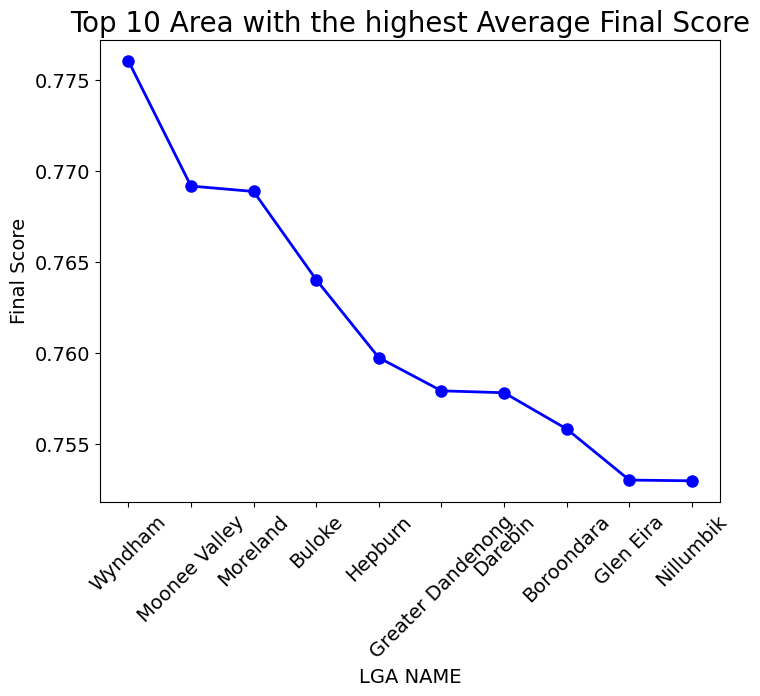

In [53]:
import matplotlib.pyplot as plt
first10_lga_ranking = lga_ranking[0:10]
plt.figure(figsize=(8, 6))
plt.plot(first10_lga_ranking.index, first10_lga_ranking.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('LGA NAME', fontsize = 14)
plt.ylabel('Final Score', fontsize=14)
plt.title('Top 10 Area with the highest Average Final Score', fontsize = 20)
plt.xticks(rotation=45, fontsize = 14) 
plt.yticks(fontsize = 14) 

In [36]:
liveable_ranking[0:20]

LGA_NAME
Boroondara         0.969919
Glen Eira          0.948416
Stonnington        0.934578
Yarra              0.930905
Moreland           0.927471
Bayside (Vic.)     0.925073
Moonee Valley      0.921945
Port Phillip       0.919085
Nillumbik          0.911164
Melbourne          0.901211
Darebin            0.896414
Wyndham            0.894382
Manningham         0.893933
Hobsons Bay        0.892130
Banyule            0.890188
Whitehorse         0.880678
Macedon Ranges     0.877185
Monash             0.872931
Maribyrnong        0.870645
Kingston (Vic.)    0.863720
Name: liveability_score, dtype: float64

(array([0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98]),
 [Text(0, 0.89, '0.89'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.91, '0.91'),
  Text(0, 0.92, '0.92'),
  Text(0, 0.93, '0.93'),
  Text(0, 0.9400000000000001, '0.94'),
  Text(0, 0.95, '0.95'),
  Text(0, 0.96, '0.96'),
  Text(0, 0.97, '0.97'),
  Text(0, 0.98, '0.98')])

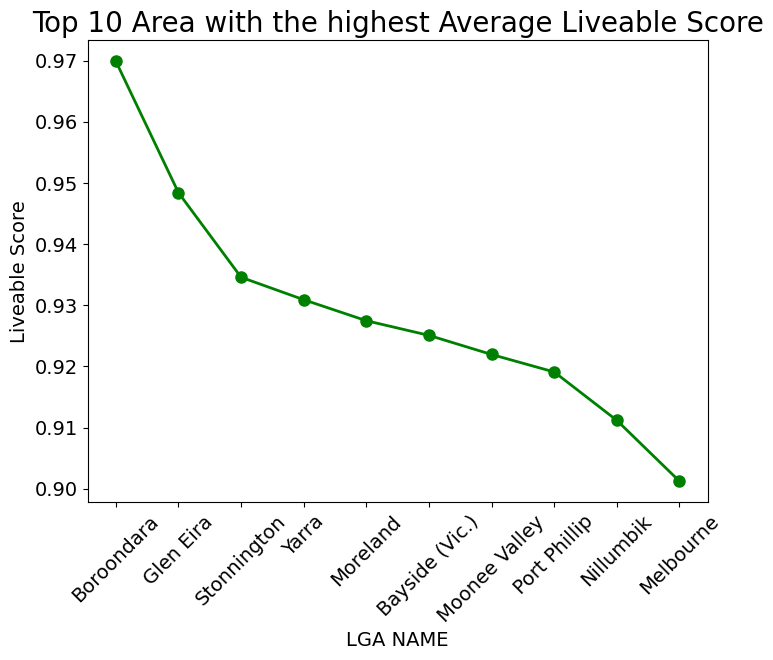

In [48]:
first10_liveable_ranking = liveable_ranking[0:10]
plt.figure(figsize=(8, 6))
plt.plot(first10_liveable_ranking.index, first10_liveable_ranking.values, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('LGA NAME', fontsize=14)
plt.ylabel('Liveable Score',fontsize=14)
plt.title('Top 10 Area with the highest Average Liveable Score',fontsize=20)
plt.xticks(rotation=45, fontsize = 14) 
plt.yticks(fontsize = 14) 

In [38]:
affordable_ranking[0:5]

LGA_NAME
Buloke          0.901724
West Wimmera    0.901538
Hindmarsh       0.887367
Yarriambiack    0.887103
Gannawarra      0.875462
Name: affordability_score, dtype: float64

(array([0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92]),
 [Text(0, 0.8, '0.80'),
  Text(0, 0.8200000000000001, '0.82'),
  Text(0, 0.8400000000000001, '0.84'),
  Text(0, 0.8600000000000001, '0.86'),
  Text(0, 0.88, '0.88'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.92, '0.92')])

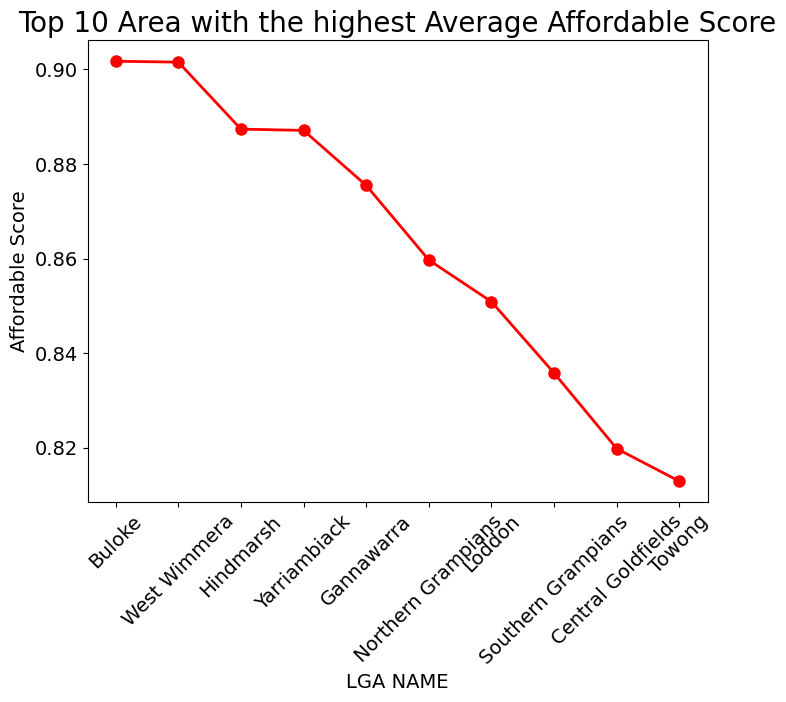

In [52]:
first10_affordable_ranking = affordable_ranking[0:10]
plt.figure(figsize=(8, 6))
plt.plot(first10_affordable_ranking.index, first10_affordable_ranking.values, marker='o', color='r', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('LGA NAME', fontsize=14)
plt.ylabel('Affordable Score',fontsize=14)
plt.title('Top 10 Area with the highest Average Affordable Score',fontsize=20)
plt.xticks(rotation=45, fontsize = 14) 
plt.yticks(fontsize = 14) 


In [41]:

future_data[future_data['LGA_NAME'] == 'Melbourne']

,Unnamed: 0,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income
43,43,Melbourne,580.202302,2.0,1.0,0.0,2.266667,6.266667,2.173333,5.17,1.53,0.93,4.556667,2024,34522.49,478000.0,1220.081255
121,122,Melbourne,605.867052,2.0,1.0,0.0,2.266667,6.266667,2.173333,5.17,1.53,0.93,4.556667,2025,34522.49,489623.0,1322.042664
199,201,Melbourne,631.500498,2.0,1.0,0.0,2.266667,6.266667,2.173333,5.17,1.53,0.93,4.556667,2026,34522.49,500459.0,1432.524922


In [42]:
future_data['crime_rate'] = future_data['Offence Count'] / future_data['population']

past_data['crime_rate'] = past_data['Offence Count'] / past_data['population']

In [43]:
future_data

,Unnamed: 0,LGA_NAME,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,distance_to_cbd,year,Offence Count,population,weekly_income,crime_rate
0,0,Alpine,423.877335,2.0,1.0,2.0,46.428333,5.346667,38.880000,29.888333,2.526667,2.446667,999.000000,2024,494.82,13547.0,855.905888,0.036526
1,1,Ararat,392.328767,3.0,1.0,1.0,2.428333,28.928333,2.536667,999.000000,1.433333,3.033333,999.000000,2024,1425.13,11884.0,776.354437,0.119920
2,2,Ballarat,429.353550,3.0,2.0,2.0,7.341667,9.785000,6.483333,24.810000,2.235000,4.776667,999.000000,2024,10663.03,169198.0,853.239387,0.063021
3,3,Banyule,519.373359,3.0,1.0,1.0,2.876667,11.215000,9.528333,5.353333,1.760000,2.630000,23.140000,2024,7947.73,138961.0,1049.530159,0.057194
4,4,Bass Coast,429.023916,3.0,2.0,2.0,86.750000,32.095000,22.930000,39.630000,3.885000,7.376667,116.675000,2024,3010.08,39431.0,710.418329,0.076338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,232,Wodonga,472.344172,3.0,2.0,2.0,10.213333,999.000000,5.975000,81.821667,2.803333,3.890000,999.000000,2026,3062.08,77804.0,961.461424,0.039356
230,233,Wyndham,516.049445,4.0,2.0,2.0,6.440000,12.295000,7.668333,13.736667,2.543333,3.648333,34.695000,2026,16824.66,778022.0,1027.621898,0.021625
231,234,Yarra,633.788319,2.0,1.0,1.0,3.283333,6.468333,4.310000,4.795000,1.603333,1.371667,9.305000,2026,12807.03,164835.0,1687.176131,0.077696
232,235,Yarra Ranges,532.294229,3.0,2.0,2.0,4.188333,15.453333,6.746667,9.856667,2.313333,3.796667,44.118333,2026,7455.14,171416.0,978.806597,0.043492


In [45]:
future_data[['LGA_NAME', 'crime_rate']].sort_values(by='crime_rate')



# desired_value = 'Merri-bek'
# indexes = future_data[future_data['LGA_NAME23'] == desired_value].index.tolist()
# indexes



,LGA_NAME,crime_rate
230,Wyndham,0.021625
152,Wyndham,0.022504
74,Wyndham,0.023471
23,Golden Plains,0.024396
179,Golden Plains,0.024744
...,...,...
157,Ararat,0.119458
79,Ararat,0.119658
1,Ararat,0.119920
123,Mildura,0.120028


In [47]:
past_data[['LGA_NAME', 'crime_rate']].sort_values(by='crime_rate')

,LGA_NAME,crime_rate
402,Cardinia,0.021143
480,Cardinia,0.022008
413,Golden Plains,0.023116
335,Golden Plains,0.023145
90,Cardinia,0.023348
...,...,...
270,Latrobe (Vic.),0.133346
313,Ararat,0.135947
36,Latrobe (Vic.),0.140604
192,Latrobe (Vic.),0.141127
